<a href="https://colab.research.google.com/github/noor60/Artificial-Neural-Network/blob/main/colour_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
import os
data_dir = './data' #my data is in content data folder. data--> trian dataset
classes = os.listdir(data_dir + "/train") # inside the train folder we have 11  folders --> 11 colours

print(classes)
test_dir = './data/test'
from google.colab import files #i had some more directory so i removed it
%rmdir '/content/data/train/.ipynb_checkpoints'
classes = os.listdir(data_dir + "/train") # inside the train folder we have 11  folders --> 11 colours
print(classes)

['black', 'white', '.ipynb_checkpoints']
['black', 'white']


In [ ]:
img_height = 200
img_width = 200
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  seed =123  #If using `validation_split` and shuffling the data, you must provide a `seed` argument, to make sure that there is no overlap between the training and validation subset.
  )
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
   seed =123,
  
  image_size=(img_height, img_width))

Found 1024 files belonging to 2 classes.
Using 820 files for training.
Found 1024 files belonging to 2 classes.
Using 204 files for validation.


In [ ]:
num_classes=2
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# # The fifth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
tf.keras.layers.Dense(1, activation='sigmoid') ])

In [ ]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs=3
mymodel = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs)

Epoch 1/3
26/26 [==============================] - 35s 1s/step - loss: 0.9769 - accuracy: 0.9610 - val_loss: 7.2533e-04 - val_accuracy: 1.0000
Epoch 2/3
26/26 [==============================] - 34s 1s/step - loss: 1.1613e-04 - accuracy: 1.0000 - val_loss: 4.4399e-06 - val_accuracy: 1.0000
Epoch 3/3
26/26 [==============================] - 34s 1s/step - loss: 1.8842e-06 - accuracy: 1.0000 - val_loss: 1.2763e-06 - val_accuracy: 1.0000


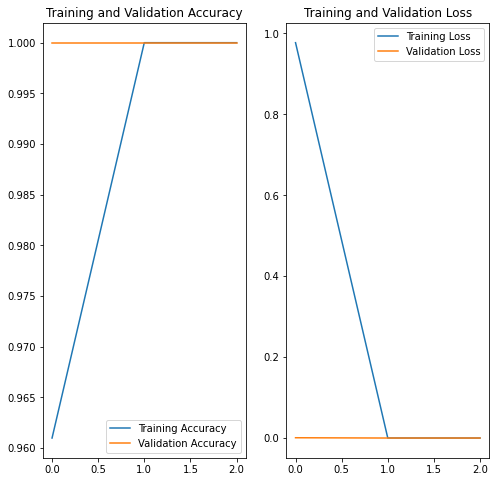

In [ ]:
acc = mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']

loss = mymodel.history['loss']
val_loss = mymodel.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from PIL import Image
from tensorflow import keras
import glob
import cv2
class_names = classes
print(class_names)
path = '/content/data/test/black/6.jpeg'

img = keras.preprocessing.image.load_img(path, target_size=(img_height,img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array =tf.expand_dims(img_array,0)
prediction=model.predict(img_array)
score=tf.nn.softmax(prediction[0])
print("this image most likely lo belong to ",[class_names[np.argmax(score)]],'with confidence ', 100*np.max(score))

['black', 'white']
this image most likely lo belong to  ['black'] with confidence  100.0
